<a href="https://colab.research.google.com/github/mfsen/tensorflowExcercises/blob/main/Regression_neural_network_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regression neural network case study**                                         
Bu projede sklearn kütüphanesi bünyesinde bulunan diabetes kütüphanesini kullanarak yapay sinir ağları ile regresyon analizi yapacağız ve aşşağıdaki adımları izleyeceğiz.
  
1.   Verinin indirilip yüklenmesi
2.   Yüklenen verilerin incelenmesi ve önişleme tabi tutulması
3.   Tensorflow ile regression modelinin oluşturulması
4.   Oluşturulan modelin eğitilmesi ve eğitimdeki hata değerlerinin çizdirilmesi
5.   Eğitilen modelin test verisi üzerinde denenmesi ve hata değerlerinin çıkarılması



In [14]:
# Gerekli kütüphanelerin yüklenmesi
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
#Verilerin indirilmesi ve yüklenmesi
diabetesData = datasets.load_diabetes()

In [5]:
#İndirilen verinin incelenmesi ve Prepreocess işlemi
diabetesData.keys() #datasetin içinde bulunan datasetle ilgili verileri anahtar kelimeleri biz burada `data`, `target` bölümündeki verileri kullanacağız


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [6]:
#Veri setinde bulunan özellikler
diabetesData["feature_names"]

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [8]:
# Burada veri tabanında bulunan özellikleri data frame olarak bir variable a aktaracağız
dataframe = pd.DataFrame(diabetesData["data"],columns=diabetesData["feature_names"])
dataframe

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [10]:
#Dataframe üzerinde bazı önişlemleri yapalım.
#öncelikle verisetinde boş veri vermı onu kontrol edelim
dataframe.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [12]:
dataframe.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [15]:
#test ve train setlerimizi hazırlıyoruz
Xtrain,Xtest,Ytrain,Ytest = train_test_split(dataframe,diabetesData["target"],test_size = 0.2, random_state=42) #toplamverimizin %20sini test olarak ayırdık ve her seferinde aynı rastgeleliği yakalamak için random state belirledik.



In [22]:
#Parametrelerde belirli bir rastgelelik için randomseed belirliyoruz
tf.random.set_seed(42)

#Modelimizi oluşturuyoruz
regmodel = tf.keras.Sequential([
                     tf.keras.layers.Dense(100),
                     tf.keras.layers.Dense(50),
                     tf.keras.layers.Dense(100),
                     tf.keras.layers.Dense(1)
])
#Modelimiz giriş katmanı ile birlikte 5 katmandan oluşan bir yapıya sahiptir. Burada çıkış katmanında tek bir sayı elde edeceğimizden dolayı tek neurallu bir katman oluşturuyoruz.

#Modelimizi compile ediyoruz şimdiki adımımızda
regmodel.compile(loss=tf.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                 metrics=["mae"])

history = regmodel.fit(Xtrain,Ytrain,epochs=200,verbose=0) # her adım için log basmaması için verbose değerini 0'a eşitledim

Text(0.5, 0, 'epochs')

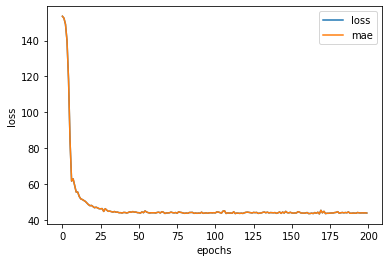

In [23]:
#Modelimizin train adımlarındaki hata değerini çizdirelim
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [24]:
# Eğittiğimiz modelin test verisi üzerindeki başırımına bakalım
pred = regmodel.predict(Xtest)
#model tarafından buluna sonuçlar ile gerçek sonuçlar arasındaki mean absulute error değerini hesaplayalım
tf.metrics.mean_absolute_error(Ytest,tf.squeeze(pred))

<tf.Tensor: shape=(), dtype=float32, numpy=44.349476>

**Sonuç**  
                                                                      Eğittiğimiz model test setimizde mae metriğine göre hata değerimiz 44 oldu. Bu değeri geliştirmek için çeşitli aksiyomları alabiliri bunlar aşşağıdaki gibidir.

1. Modeldeki parametre ya da katman sayısı arttırılabilir
2. Modelde kullanılan learning rate ya da optimizer değiştirilebilir.
3. Model daha uzun süre eğitilebilir.
4. Bu örnek için değil ama gündelik hayatta modelimiz hada fazla veri üzerinde eğitilebilir.
